# Linear Regression Email Spam Classifier



### 1. Fetch Spam Assassin Data

HAM and SPAM represent non-spam and spam emails respectively.

In [1]:
import os 
import shutil
from modules.download import DataDownloader

In [2]:
# Set up variables for downloading the data

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_FILE = "20030228_easy_ham.tar.bz2"
SPAM_FILE = "20030228_spam.tar.bz2"
HAM_URL = DOWNLOAD_ROOT + HAM_FILE
SPAM_URL = DOWNLOAD_ROOT + SPAM_FILE
SPAM_PATH = os.path.join("datasets", "spam") # datasets/spam
HAM_PATH = os.path.join("datasets", "ham") # datasets/ham

In [3]:
# Create a DataDownloader object and download the files

data = DataDownloader(DOWNLOAD_ROOT, [HAM_FILE, SPAM_FILE])
data.download()

Filetype:  bz2
Done!
Filetype:  bz2
Done!


In [4]:
# Modify file directory for convenience

sources = ["datasets/20030228_easy_ham.tar.bz2/easy_ham", "datasets/20030228_spam.tar.bz2/spam"]
for source in sources: 
    shutil.move(source, "datasets", copy_function=shutil.copytree)
    os.rmdir(os.path.dirname(source))
    # print(os.path.dirname(source))

In [5]:
os.rename("datasets/easy_ham", "datasets/ham")

----

### 2. Parsing Data

In [6]:
import email
import pandas as pd
import numpy as np

In [7]:
# Assemble pd database from parsing

content = []
# Loop through ham and spam
for ham_or_spam in os.listdir("datasets/"):
    for file in os.listdir("datasets/" + ham_or_spam):
        path_to_email = os.path.join("datasets", ham_or_spam, file)
        with open(path_to_email, "rb") as email_file:
            # Parse the email message using the email package
            message = email.message_from_binary_file(email_file)

            # Get the subject of the email
            subject = message["Subject"]

            # Get the sender of the email
            sender = message["From"]

            # Get the recipient(s) of the email
            recipients = message["To"]

            # Get the body of the email
            if message.is_multipart():
                for part in message.walk():
                    content_type = part.get_content_type()
                    content_disposition = str(part.get("Content-Disposition"))
                    if content_type == "text/plain" and "attachment" not in content_disposition:
                        body = part.get_payload()
                        break
            else:
                body = message.get_payload()
            
            content.append([subject, sender, body, recipients, 1 if ham_or_spam == "spam" else 0])


In [8]:
data_representation = np.array(content)
df = pd.DataFrame(data_representation, columns = ["Subject", "Sender", "Body", "Recipient", "Spam"])
df.head()

,Subject,Sender,Body,Recipient,Spam
0,Re: New Sequences Window,Robert Elz <kre@munnari.OZ.AU>,"Date: Wed, 21 Aug 2002 10:54:46 -05...",Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,0
1,[zzzzteana] RE: Alexander,Steve Burt <Steve_Burt@cursor-system.com>,"Martin A posted:\nTassos Papadopoulos, the Gre...","""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...",0
2,[zzzzteana] Moscow bomber,"""Tim Chapman"" <timc@2ubh.com>",Man Threatens Explosion In Moscow \n\nThursday...,zzzzteana <zzzzteana@yahoogroups.com>,0
3,[IRR] Klez: The Virus That Won't Die,Monty Solomon <monty@roscom.com>,Klez: The Virus That Won't Die\n \nAlready the...,undisclosed-recipient: ;,0
4,Re: [zzzzteana] Nothing like mama used to make,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,"> in adding cream to spaghetti carbonara, whi...",zzzzteana@yahoogroups.com,0


----

### 3. Data Exploration

In [ ]:
df[df["Spam"]==1].head()

In [ ]:
print(df.iloc[0]["Body"].strip())

In [ ]:
df["Body"].head()

---

### 4. Preprocessing

In [9]:
from modules.processing import Process
import nltk

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amira\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
processed_text = []
for index, row in df.iterrows():
    # tx = Process.clean_everything(df.loc[index]["Body"])
    # tx = Process.stop_word_removal(tx)
    # tx = Process.lem_words(tx)
    # tx = Process.lower_case(tx)
    tx = Process.all(df.loc[index]["Body"])
    processed_text.append(tx)

df["Processed"] = processed_text
df.head()

Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text...
Processing all...
Lemmatizing, removing stop words, and cleaning text

,Subject,Sender,Body,Recipient,Spam,Processed
0,Re: New Sequences Window,Robert Elz <kre@munnari.OZ.AU>,"Date: Wed, 21 Aug 2002 10:54:46 -05...",Chris Garrigues <cwg-dated-1030377287.06fa6d@D...,0,date wed # aug # # # # # chris garrigues email...
1,[zzzzteana] RE: Alexander,Steve Burt <Steve_Burt@cursor-system.com>,"Martin A posted:\nTassos Papadopoulos, the Gre...","""'zzzzteana@yahoogroups.com'"" <zzzzteana@yahoo...",0,martin posted tassos papadopoulos greek sculpt...
2,[zzzzteana] Moscow bomber,"""Tim Chapman"" <timc@2ubh.com>",Man Threatens Explosion In Moscow \n\nThursday...,zzzzteana <zzzzteana@yahoogroups.com>,0,man threatens explosion moscow thursday august...
3,[IRR] Klez: The Virus That Won't Die,Monty Solomon <monty@roscom.com>,Klez: The Virus That Won't Die\n \nAlready the...,undisclosed-recipient: ;,0,klez virus wont die already prolific virus eve...
4,Re: [zzzzteana] Nothing like mama used to make,Stewart Smith <Stewart.Smith@ee.ed.ac.uk>,"> in adding cream to spaghetti carbonara, whi...",zzzzteana@yahoogroups.com,0,adding cream spaghetti carbonara effect pasta ...


#### Data Viz

Let us compare the word clouds for the emails before the processing and after the processing:

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

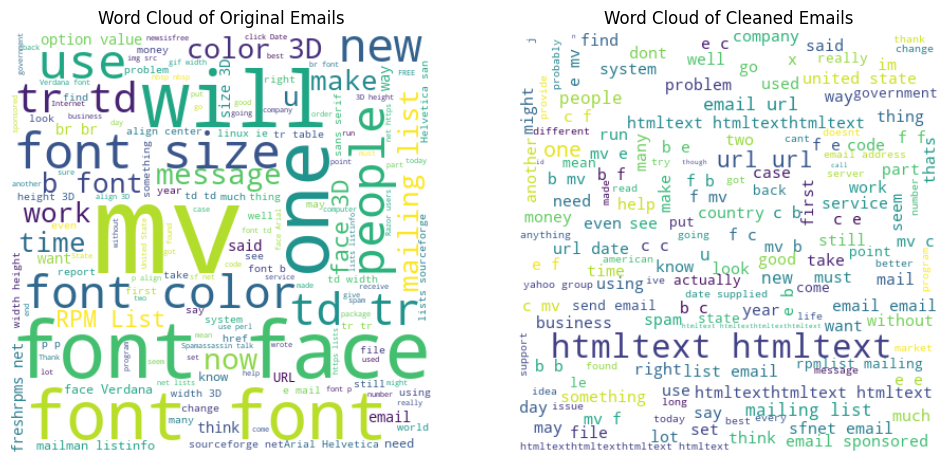

In [22]:
# Generate word cloud for original text
original_text = ' '.join(df['Body'])
wordcloud_original = WordCloud(width=400, height=400, max_words=150, background_color='white').generate(original_text)

# Generate word cloud for cleaned text
cleaned_text = ' '.join(df['Processed'])
wordcloud_cleaned = WordCloud(width=400, height=400, max_words=150, background_color='white').generate(cleaned_text)

# Create subplots to display word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_original, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Original Emails')
axes[1].imshow(wordcloud_cleaned, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Cleaned Emails')

plt.show()


It would also be pretty interesting to compare the word clouds for the spam emails and the ham emails following the processing:

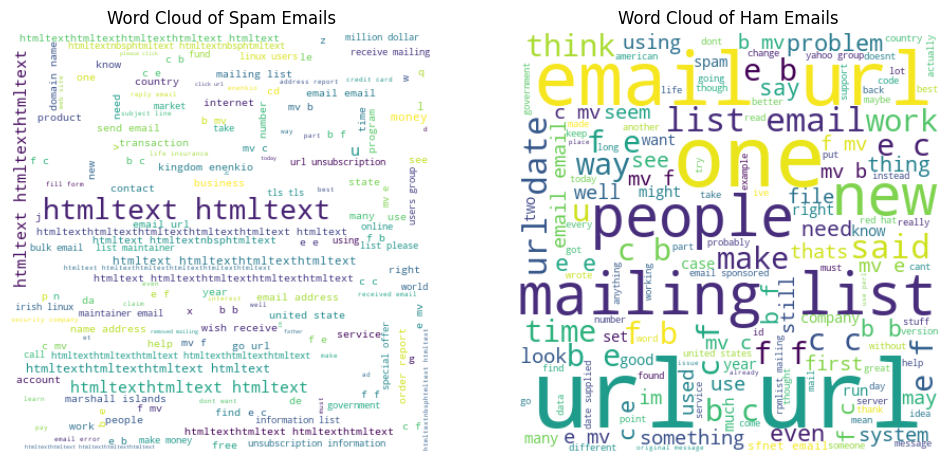

In [23]:
# Generate word cloud for spam text
spam_text = ' '.join(df[df['Spam'] == 1]['Processed'])
wordcloud_spam = WordCloud(width=400, height=400, max_words=150, background_color='white').generate(spam_text)

# Generate word cloud for non-spam text
ham_text = ' '.join(df[df['Spam'] == 0]['Processed'])
wordcloud_ham = WordCloud(width=400, height=400, max_words=150, background_color='white').generate(ham_text)

# Create subplots to display word clouds side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_spam, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Spam Emails')
axes[1].imshow(wordcloud_ham, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Ham Emails')

plt.show()

---

### 5. Training & Evaluating Models

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [13]:
# convert pandas series datatype from object to int
df["Spam"] = df["Spam"].astype(int)

#### Logistic Regression

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df["Processed"], df["Spam"], test_size=0.2, random_state=42)

In [15]:
vectorizer= TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [16]:
model = LogisticRegression()
model.fit(X_train_vectorized, Y_train)

LogisticRegression()

In [17]:
Y_pred = model.predict(X_test_vectorized)
matrix = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

Let's see how the model did now:

In [18]:
import textwrap 
import seaborn as sns

In [19]:
print("\t\t" +  textwrap.dedent(report).strip())

		precision    recall  f1-score   support

           0       0.95      1.00      0.97       497
           1       1.00      0.75      0.86       104

    accuracy                           0.96       601
   macro avg       0.98      0.88      0.92       601
weighted avg       0.96      0.96      0.95       601


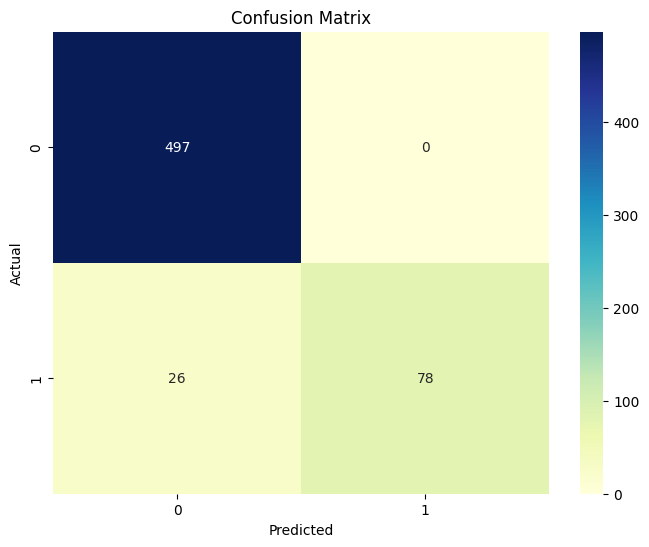

In [24]:
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### 6. Testing the Models

In [ ]:
"""
Classify a new email from user input
"""

sample_email = input("Provide some email to classify: ")

string = Process.all(sample_email)
X_new = vectorizer.transform([string])
Y_pred = model.predict(X_new)

print("Classification:\n \"" +  sample_email[:20] + "\"... is: " + "spam" if Y_pred else "ham")

### 7. Exporting

In [27]:
from joblib import dump

In [26]:
dump(model, 'models/logistic_regression.joblib')

['models/logistic_regression.joblib']